In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

import torch
from torch import nn
import torch.nn.functional as F

In [4]:
def perceptron(x, w, b = 0):
    if not isinstance(x, np.ndarray) or not isinstance(w, np.ndarray):
        print('not isinstance')
        x = np.array(x)
        w = np.array(w)
    y = np.sum(x*w) + b
    return y

x = [1, 2, 3]
w = [1, 2, 3]

y = perceptron(x, w)
print(y)

not isinstance
14


In [18]:
def perceptron(x):
    w = np.random.rand(len(x))
    b = np.random.rand()
    y = np.sum(w*x) + b
    return y, w, b

x = np.array([1, 2, 3])
w = np.array([1, 2, 3])
print(x, w)

y, w, b = perceptron(x)
print(y)
print(w)
print(b)

[1 2 3] [1 2 3]
5.153157467245709
[0.43471188 0.67407689 0.9335623 ]
0.5696049168575209


In [36]:
input_size = 10
output_size = 1
y = nn.Linear(input_size, output_size)

print(y.weight)
print(y.bias)
print()

x = torch.rand(input_size)
print(x)
print(y(x))

Parameter containing:
tensor([[ 0.0475, -0.0059,  0.1340,  0.1402,  0.0264, -0.1410,  0.1410,  0.2195,
         -0.2058, -0.2751]], requires_grad=True)
Parameter containing:
tensor([-0.0286], requires_grad=True)

tensor([0.9318, 0.1335, 0.4193, 0.5599, 0.0264, 0.9025, 0.5874, 0.0170, 0.5095,
        0.2717])
tensor([-0.0700], grad_fn=<ViewBackward0>)


In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sse(y, x):
    return (y-x)**2

def perceptron(x, w, b = 0):
    if not isinstance(x, np.ndarray) or not isinstance(w, np.ndarray):
        print('not isinstance')
        x = np.array(x)
        w = np.array(w)
    y = np.sum(x*w) + b
    return y

In [38]:
def activation_plot(x, y, title:str):
    plt.plot(x, y)
    plt.title(title)
    plt.show()

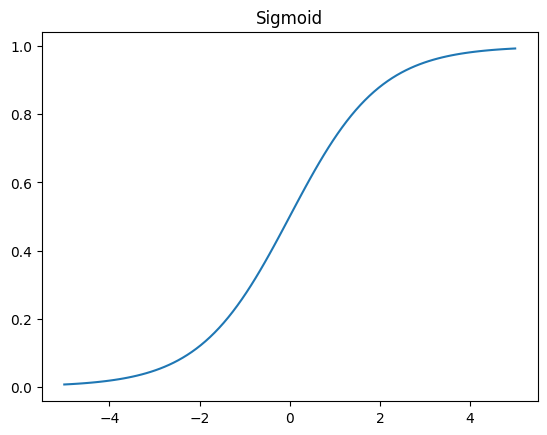

In [40]:
x = np.linspace(-5, 5, 100)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y = sigmoid(x)

activation_plot(x, y, 'Sigmoid')

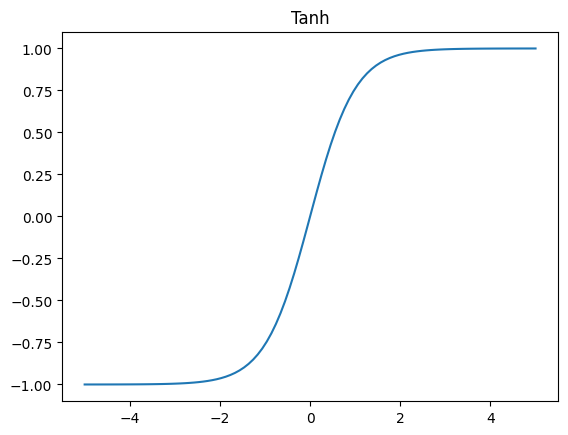

In [46]:
def tanh(x):
    y = np.tanh(x)
    return y

y = tanh(x)

torch_tanh = nn.Tanh()
y = torch_tanh(torch.tensor(x))
y = F.tanh(torch.tensor(x))

activation_plot(x, y, 'Tanh')

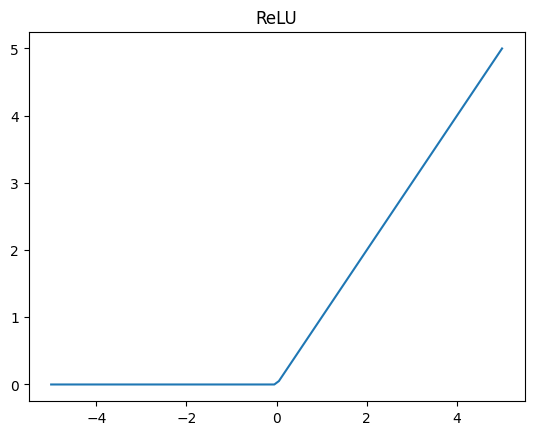

In [47]:
def relu(x):
    y = np.maximum(0, x)
    return y

torch_relu = nn.ReLU()
y = torch_relu(torch.tensor(x))
y = F.relu(torch.tensor(x))

activation_plot(x, y, 'ReLU')

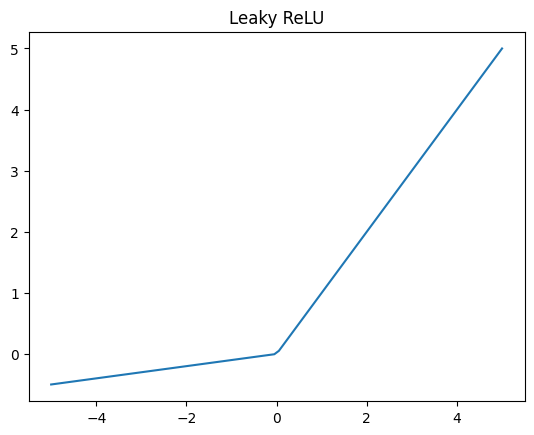

In [48]:
def leakyRelu(x, alpha:float):
    y = np.maximum(alpha*x, x)
    return y

y = leakyRelu(x, 0.1)

torch_lrelu = torch.nn.LeakyReLU(0.1)
y = torch_lrelu(torch.tensor(x))
y = F.leaky_relu(torch.tensor(x), 0.1)

activation_plot(x, y, 'Leaky ReLU')

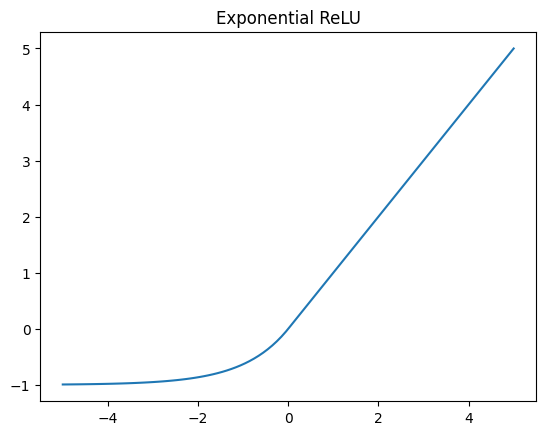

In [52]:
def eReLU(x, alpha):
    y = (x>0)*x + (x<=0)*(alpha*(np.exp(x) -1))
    return y

y = eReLU(x, 1.)

torch_erelu = nn.ELU(1)
y = torch_erelu(torch.tensor(x))
y = F.elu(torch.tensor(x), 1)

activation_plot(x, y, 'Exponential ReLU')